<a href="https://colab.research.google.com/github/KazGet/Theory-of-random-processes/blob/main/IDZ1_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Фермер собирает в год x тонн пшеницы, которую продает на свободном рынке. Сразу после продажи все вырученные средства он готов потратить на погашение кредита в y млн. руб. Текущая фьючерсная цена тонны пшеницы составляет z тыс. руб. За три месяца до сбора урожая фермер решает застраховаться от возможного резкого изменения цен на пшеницу, потому что ему важно погасить кредит именно в текущем году. Что вы ему посоветуете (аргументируйте расчетами) сделать сейчас, если процентная ставка по кредиту составляет 18% годовых, безрисковая процентная ставка равна 12% годовых, волатильность цен базового актива составляет 0,4?
•	Купить фьючерс на всю величину урожая x по цене z со сроком исполнения три месяца;
•	продать фьючерс на всю величину урожая x по цене z со сроком исполнения три месяца;
•	купить опцион покупателя на всю величину урожая x по цене исполнения E тыс. руб. за тонну;
•	купить опцион продавца на всю величину урожая x по цене исполнения E тыс. руб. за тонну.


In [ ]:
x= 3000
y = 9*10**6
z = 3*10**3
b = 0.18
r=0.12
sigma = 0.4


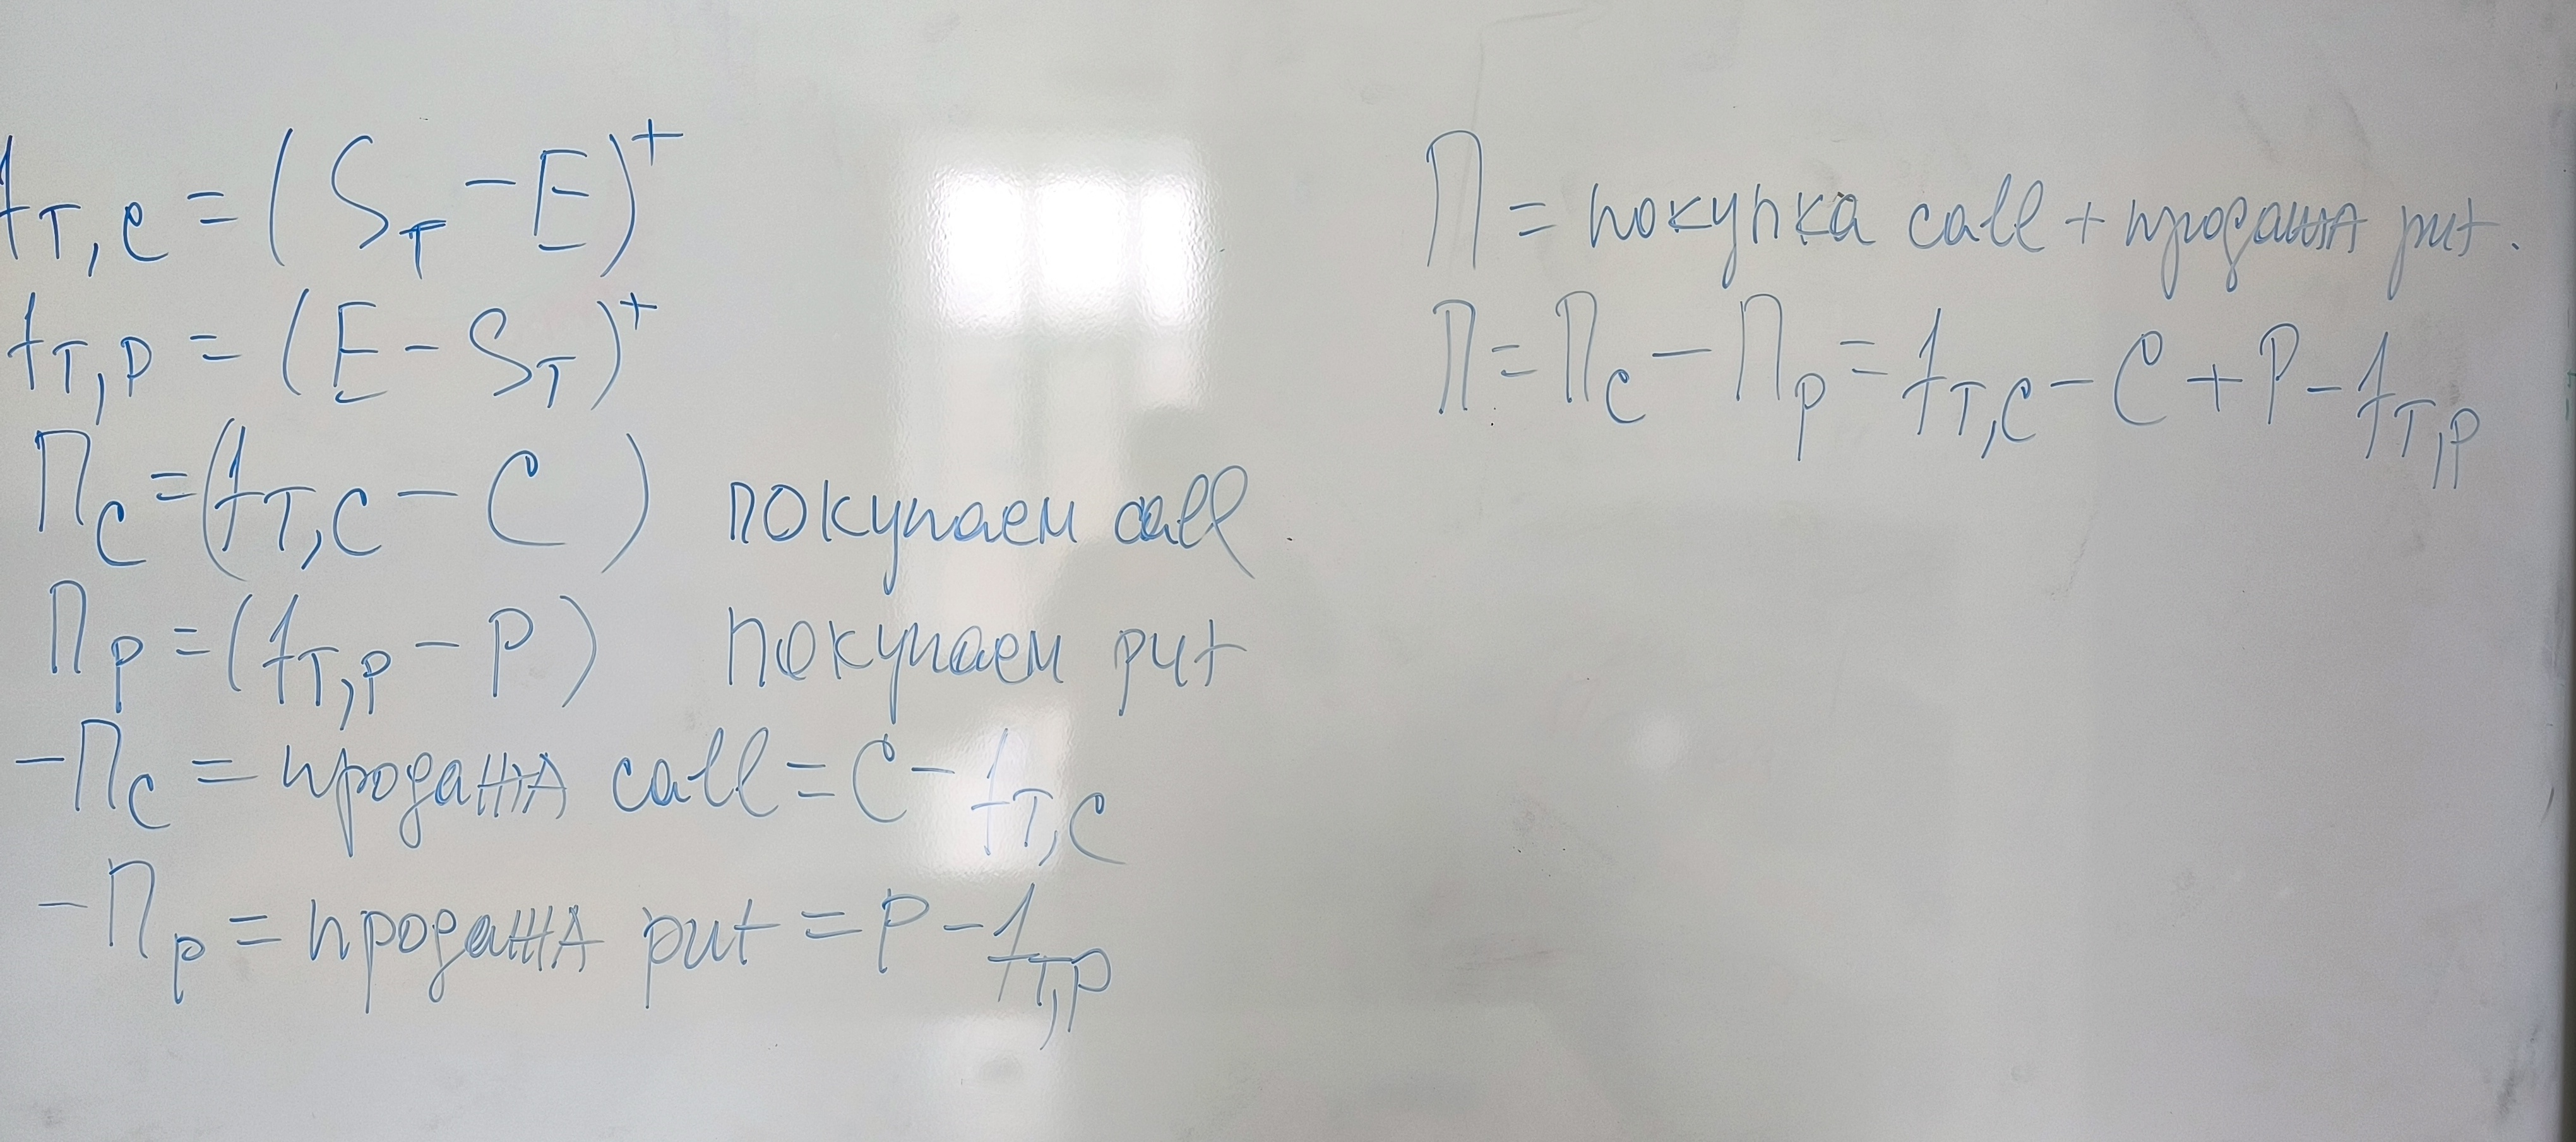

Нарисуйте функцию выплаты и функцию возможной прибыли для опциона продавца с точки зрения держателя опциона, если цена исполнения равна 8 руб., а сам опцион стоит 10 руб.

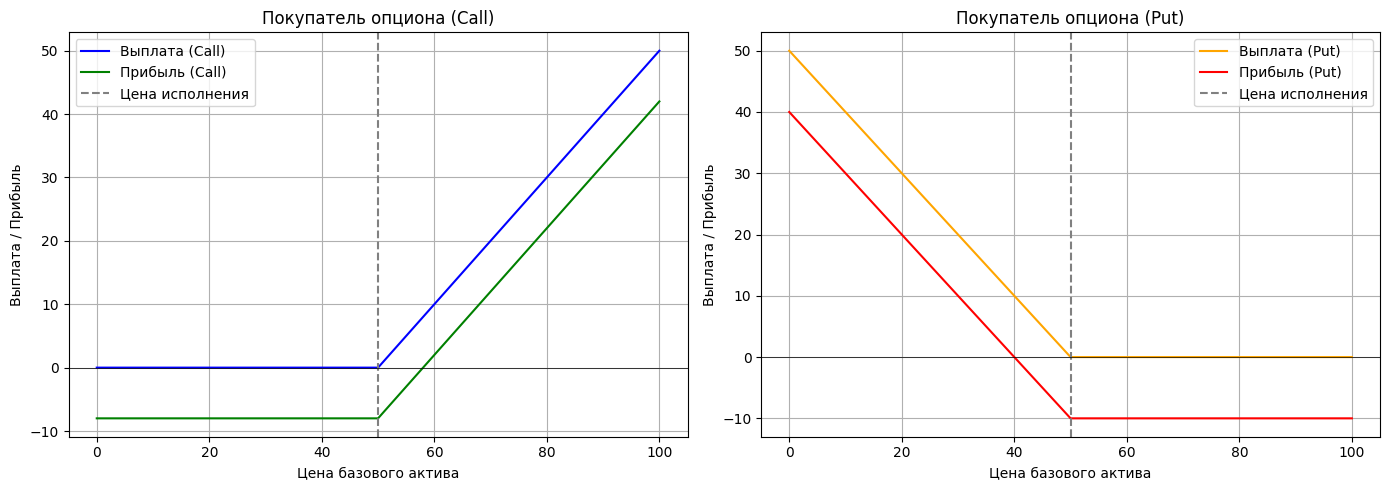

In [ ]:
#Фермер - урожай покупать не надо - своего достаточно
import numpy as np
import matplotlib.pyplot as plt

x = 50
y = 8
z = 10

S=np.linspace(0, 100, 500, dtype=int)

# Покупатель Call
payoff_call = np.maximum(S - x, 0)
profit_call = payoff_call - y

# Покупатель Put
payoff_put = np.maximum(x - S, 0)
profit_put = payoff_put - z

# Построение графиков
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Покупатель Call
axs[0].plot(S, payoff_call, label='Выплата (Call)', color='blue')
axs[0].plot(S, profit_call, label='Прибыль (Call)', color='green')
axs[0].axvline(x, color='gray', linestyle='--', label='Цена исполнения')
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].set_title('Покупатель опциона (Call)')
axs[0].set_xlabel('Цена базового актива')
axs[0].set_ylabel('Выплата / Прибыль')
axs[0].legend()
axs[0].grid(True)

# Покупатель Put
axs[1].plot(S, payoff_put, label='Выплата (Put)', color='orange')
axs[1].plot(S, profit_put, label='Прибыль (Put)', color='red')
axs[1].axvline(x, color='gray', linestyle='--', label='Цена исполнения')
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].set_title('Покупатель опциона (Put)')
axs[1].set_xlabel('Цена базового актива')
axs[1].set_ylabel('Выплата / Прибыль')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



1)	Как изменится рисунок, если инвестор сразу купит по одному опциону покупателя и продавца («стрэддл»)?

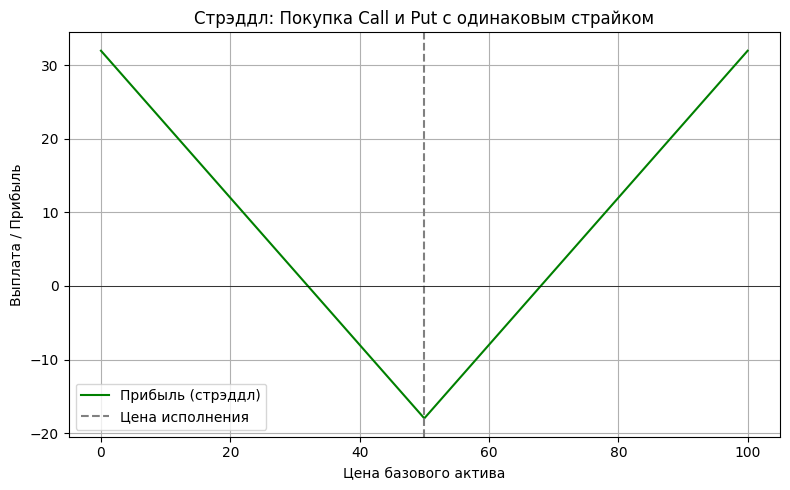

In [ ]:
profit_straddle = profit_call + profit_put

# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(S, profit_straddle, label='Прибыль (стрэддл)', color='green')
plt.axvline(x, color='gray', linestyle='--', label='Цена исполнения')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Стрэддл: Покупка Call и Put с одинаковым страйком')
plt.xlabel('Цена базового актива')
plt.ylabel('Выплата / Прибыль')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

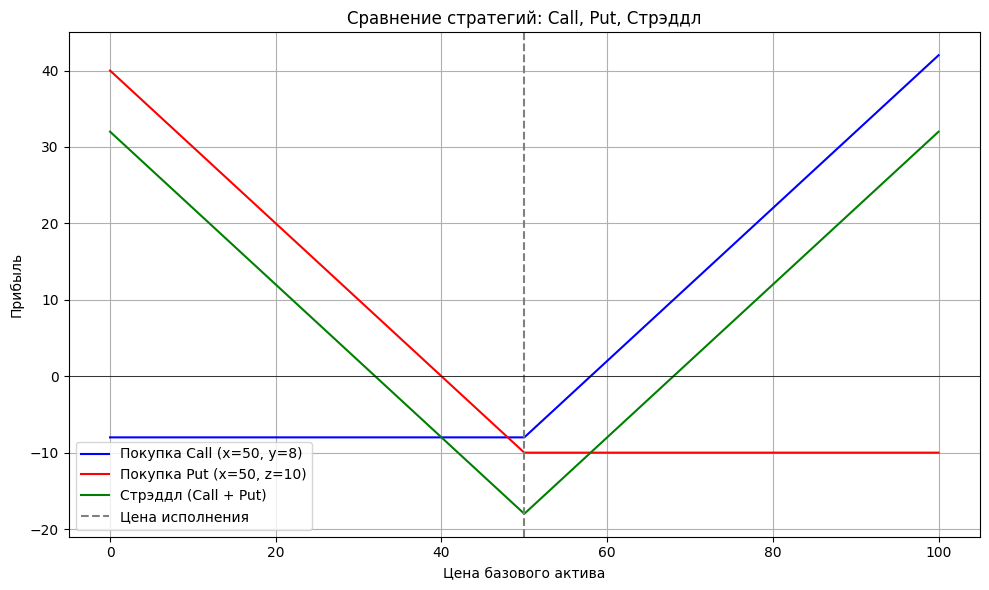

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(S, profit_call, label=f'Покупка Call (x={x}, y={y})', color='blue')
plt.plot(S, profit_put, label=f'Покупка Put (x={x}, z={z})', color='red')
plt.plot(S, profit_straddle, label='Стрэддл (Call + Put)', color='green')
plt.axvline(x, color='gray', linestyle='--', label='Цена исполнения')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Сравнение стратегий: Call, Put, Стрэддл')
plt.xlabel('Цена базового актива')
plt.ylabel('Прибыль')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



2)	Исходя из рисунка, какой вариант покупки (из трех) выгоднее?

Прибыль call:

\begin{cases}
-8, & \text{если } S < 50 \\
S - 50 - 8, & \text{если } S \ge 50
\end{cases}

Прибыль put:

\begin{cases}
50 - S - 10, & \text{если } S \le 50 \\
-10, & \text{если } S > 50
\end{cases}

Пересечение: -8 = 40 - S;  
S=48

\begin{cases}
x \in [0;\,48] & \text{- выгодна покупка Put} \\
x \in [48;\,+\infty) & \text{- выгодна покупка Call}
\end{cases}




3)	Составим портфель («бычий спред»), купив опцион покупателя с ценой исполнения x руб. и стоимостью y руб., а также продав опцион покупателя с ценой исполнения 55 руб. и стоимостью 5 руб. Выгоднее ли этот портфель всех предыдущих вариантов (привести расчеты)?

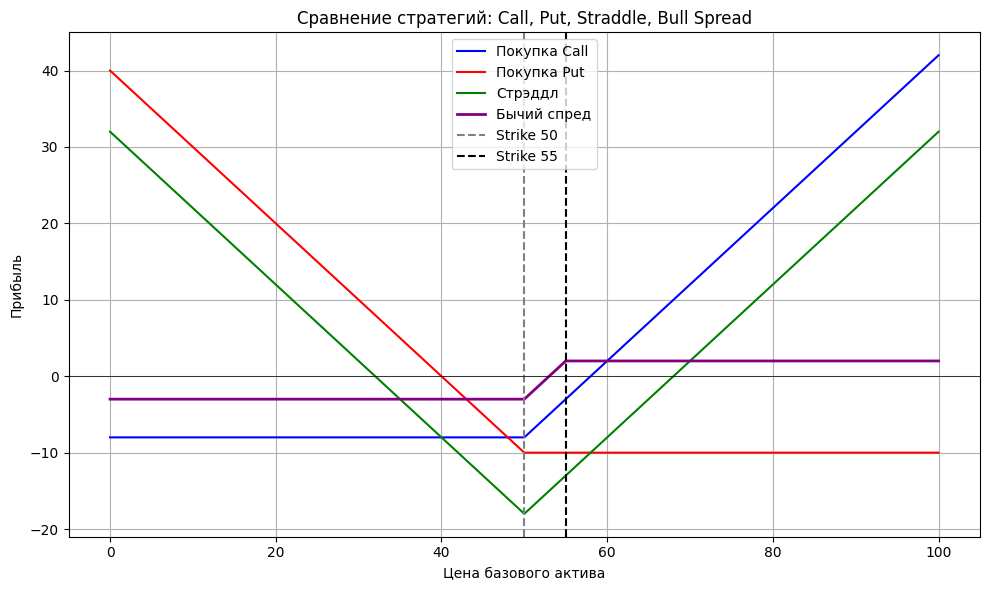

In [ ]:
x2=55
y2=5

# Выплаты по call опционам
payoff_long = np.maximum(S - x, 0)
payoff_short = np.maximum(S - x2, 0)

# Прибыль от бычьего спреда
profit_bull_spread = payoff_long - payoff_short - (y - y2)

# График
plt.figure(figsize=(10, 6))
plt.plot(S, profit_call, label='Покупка Call', color='blue')
plt.plot(S, profit_put, label='Покупка Put', color='red')
plt.plot(S, profit_straddle, label='Стрэддл', color='green')
plt.plot(S, profit_bull_spread, label='Бычий спред', color='purple', linewidth=2)

plt.axvline(x, linestyle='--', color='gray', label='Strike 50')
plt.axvline(x2, linestyle='--', color='black', label='Strike 55')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Сравнение стратегий: Call, Put, Straddle, Bull Spread')
plt.xlabel('Цена базового актива')
plt.ylabel('Прибыль')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Рассчитаем выгодные участки:

Прибыль "бычий спред"
\begin{cases}
-3, & \text{если } S < 50 \\
S - 53, & \text{если } 50 \le S < 55 \\
2, & \text{если } S \ge 55
\end{cases}

Прибыль call:

\begin{cases}
-8, & \text{если } S < 50 \\
S - 50 - 8, & \text{если } S \ge 50
\end{cases}

Прибыль put:

\begin{cases}
50 - S - 10, & \text{если } S \le 50 \\
-10, & \text{если } S > 50
\end{cases}


Первая точка пересечения - графики покупки put и "бычий спред". Точка пересечения:


\begin{aligned}
50 - S - 10 &= -3 \\
40 - S &= -3 \\
-S &= -3 - 40 \\
-S &= -43 \\
S &= 43
\end{aligned}

Вторая точка пересечения: графики покупки call и "бычий спред". По графику видно, что
\begin{aligned}
S &= 60
\end{aligned}

В общем случае, выгодные участки:

\begin{cases}
x \in [0;\,43) & \text{- выгодна покупка Put} \\
x \in [43;\,60) & \text{- выгодна покупка Bull Spread}\\
x \in [60;\,+\infty) & \text{- выгодна покупка Call}
\end{cases}

4)	Составим портфель («бабочка»), продав два опциона покупателя (первый – с ценой исполнения x руб. и стоимостью y руб.; второй - с ценой исполнения (x+10) руб. и стоимостью (y – 2) руб.), а также купив опцион покупателя с ценой исполнения (x + 5) руб. и стоимостью 6 руб.. Выгоднее ли этот портфель всех предыдущих вариантов (привести расчеты)?

In [ ]:
butterfly = -(np.maximum(S-x, 0)-y)-(np.maximum(S-(x+10), 0)-(y-2))+np.maximum(S-(x+5), 0)-6

# График
plt.figure(figsize=(10, 6))
plt.plot(S, profit_call, label='Покупка Call', color='blue')
plt.plot(S, profit_put, label='Покупка Put', color='red')
plt.plot(S, profit_straddle, label='Стрэддл', color='green')
plt.plot(S, butterfly, label='Бабочка', color='orange')
plt.plot(S, profit_bull_spread, label='Бычий спред', color='purple', linewidth=2)

plt.axvline(x, linestyle='--', color='gray', label='Strike 50')
plt.axvline(x+5, linestyle='--', color='black', label='Strike 55')
plt.axvline(x+10, linestyle='--', color='navy', label='Strike 60')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Сравнение стратегий: Call, Put, Straddle, Bull Spread, Butterfly')
plt.xlabel('Цена базового актива')
plt.ylabel('Прибыль')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(S, profit_call, label='Покупка Call', color='blue')
plt.plot(S, profit_put, label='Покупка Put', color='red')
plt.plot(S, profit_straddle, label='Стрэддл', color='green')
plt.plot(S, butterfly, label='Бабочка', color='orange')
plt.plot(S, profit_bull_spread, label='Бычий спред', color='purple', linewidth=2)
a`
plt.axvline(x, linestyle='--', color='gray', label='Strike 50')
plt.axvline(x+5, linestyle='--', color='black', label='Strike 55')
plt.axvline(x+10, linestyle='--', color='navy', label='Strike 60')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Вторая точка пересечения')
plt.xlabel('Цена базового актива')
plt.ylabel('Прибыль')
plt.legend()
plt.grid(True)
plt.xlim(59, 62)
plt.ylim(2, 3.5)
plt.tight_layout()
plt.show()



SyntaxError: invalid syntax (<ipython-input-5-204c65878514>, line 29)

Рассчитаем выгодные промежутки:

Прибыль "бабочка":

\begin{cases}
8, & S \le 50 \\
-S + 58, & 50 < S < 55 \\
3, & 55 \le S < 60 \\
-S + 63, & S \ge 60
\end{cases}

Первое пересечение с графиком покупки put:

\begin{cases}
50 - S - 10, & \text{если } S \le 50 \\
-10, & \text{если } S > 50
\end{cases}

 Приравняем уравнения на участке S<=50:

 \begin{aligned}
50 - S - 10 &= 8 \\
40 - S &= 8 \\
-S &= 8 - 40 \\
-S &= -32 \\
S &= 32
\end{aligned}


Вторая точка пересечения - "бабочка" и покупка call на участке S>=60.

Прибыль call:

\begin{cases}
-8, & \text{если } S < 50 \\
S - 50 - 8, & \text{если } S \ge 50
\end{cases}

Уравнение:

 \begin{aligned}
- S + 63 &= S - 58 \\
2S &= 121 \\
S &= 60.5
\end{aligned}

Выгодные участки:

\begin{cases}
x \in [0;\,32) & \text{- выгодна покупка Put} \\
x \in [32;\,60.5) & \text{- выгодна покупка Butterfly}\\
x \in [60.5;\,+\infty) & \text{- выгодна покупка Call}
\end{cases}


Задача №4
Текущая цена акции равна 100 руб., а цена исполнения опциона покупателя европейского типа равна 110 руб. со сроком исполнения один год (T=1). Пусть безрисковая процентная ставка r=0,12, волатильность равна 0,3. Найдите

•	Хеджирующее соотношение Δ для опциона покупателя.

•	Текущую цену (в момент t) опциона покупателя.

•	Цену опциона покупателя спустя полгода с момента его выпуска.

Как увеличение срока исполнения в два раза влияет на текущую цену опциона покупателя?

Используя соотношение call-put, найдите текущую цену опциона продавца европейского типа со сроком исполнения один год (T=1) и ценой исполнения 90 руб.  



In [ ]:
from scipy.stats import norm
import numpy as np
from math import log, exp

T=1
S=100
E=110
r=0.12
sigma = 0.3
t=0
tao=T-t
d1 = (log(S / E) + (r + 0.5 * sigma ** 2) * (tao)) / (((tao) ** 0.5) * sigma)
delta = norm.cdf(d1)
print(delta)
#Покупака дериватива - покупка базового актива
#Покупка put - продажа базового актива

0.5918472610410006


In [ ]:
#Текущая цена (в момент t) опциона покупателя
E=110
T=1
t=0
tao = T-t
d1 = (log(S / E) + (r + 0.5 * (sigma ** 2)) * (tao)) / (((tao) ** 0.5) * sigma)
d2 = d1 - sigma * (tao ** 0.5)
C_t = S * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
print("Ct: ", C_t)

Ct:  13.037086402959702


In [ ]:
T=1/2
t=0
E=110
tao = T-t
d1 = (log(S / E) + (r + 0.5 * sigma ** 2) * (tao)) / (((tao) ** 0.5) * sigma)
d2 = d1 - sigma * (tao ** 0.5)
C_t_half = S * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
print("Ct: ", C_t_half)

Ct:  6.920138328376694


In [ ]:
T=1
double_T=2*T
t=0
tao = double_T-t
d1 = (log(S / E) + (r + 0.5 * sigma ** 2) * (tao)) / (((tao) ** 0.5) * sigma)
d2 = d1 - sigma * (tao ** 0.5)
C2t = S * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
print("C2t: ", C2t)

C2t:  23.290564317784685


In [ ]:
#Соотношение call-put
E=90
T=1
tao = T-t
d1 = (log(S / E) + (r + 0.5 * sigma ** 2) * (tao)) / (((tao) ** 0.5) * sigma)
d2 = d1 - sigma * (tao ** 0.5)
Cpt = S * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
P = Cpt - S + E*exp(-r*T)
print(P)

3.485655773406151


In [ ]:
print("Дельта: ", delta)
print("Текущая цена C в момент t=0: ", C_t)
print("Ценa опциона покупателя спустя полгода с момента его выпуска: ", C_t_half)
print("Увеличение срока исполнения в два раза:", C2t)
print("Цена опциона продавца через соотношение:", P)


Дельта:  0.5918472610410006
Текущая цена C в момент t=0:  13.037086402959702
Ценa опциона покупателя спустя полгода с момента его выпуска:  6.920138328376694
Увеличение срока исполнения в два раза: 23.290564317784685
Цена опциона продавца через соотношение: 3.485655773406151


Задача №5
Пусть безрисковая процентная ставка r=0,18. Пусть текущая цена базового актива составляет 200 руб., а волатильность σ = 0,3 в год. Используя формулу Блэка – Шоулса, найдите цену опциона покупателя с исполнением через T = 4 года, если цена исполнения E составит 195 руб. Пользуясь соотношением call – put, вычислите цену опциона продавца с исполнением через T = 4 года, если цена исполнения составит 200 руб.

Как изменятся цены этих опционов, если волатильность повысится до σ = 0,4? Приведите результаты расчетов. Сравните их с полученными ранее.

Как изменятся цены этих опционов, если при волатильности σ = 0,5 цены исполнения составят 205 руб. для опциона покупателя и  190 руб. для опциона продавца? Они повысятся?


image.png

In [ ]:
t=0
r=0.18
S=200
sigma = 0.3
T = 4
x = 195
y = 200

def shouls(S, E, r, T, t, sigma):
  d1 = (log(S / E) + (r + 0.5 * sigma ** 2) * (T-t)) / (((T-t) ** 0.5) * sigma)
  d2 = d1 - sigma * ((T-t) ** 0.5)
  V = S*norm.cdf(d1)-E*exp(-r*(T-t))*norm.cdf(d2)
  return V

def call_put(S, E, r, T, t, sigma):
  tao=T-t
  d1 = (log(S / E) + (r + 0.5 * sigma ** 2) * (tao)) / (((tao) ** 0.5) * sigma)
  d2 = d1 - sigma * (tao ** 0.5)
  Cpt = S * norm.cdf(d1) - E * exp(-r * tao) * norm.cdf(d2)
  P = Cpt - S + E*exp(-r*T)
  return P

print("__"*40)
print("σ = 0,3")
print("Цена опциона call: ", shouls(S, y, r, T, t, sigma))
print("Цена опциона put: ", call_put(S, y, r, T, t, sigma))


#Как изменятся цены этих опционов, если волатильность повысится до σ = 0,4?
print("__"*40)
print("σ = 0,4")
print("Цена опциона call: ", shouls(S, y, r, T, t, 0.4))
print("Цена опциона put: ", call_put(S, y, r, T, t, 0.4))


"""Как изменятся цены этих опционов, если при волатильности σ = 0,5 цены исполнения составят (x + 10) руб. для опциона покупателя и  (y – 10) руб. для опциона продавца? Они повысятся?"""
print("__"*40)
print("σ = 0,5; E=(x+10) для  call; E=(y-10) для put")
print("Цена опциона call: ", shouls(S, x+10, r, T, t, 0.5))
print("Цена опциона put: ", call_put(S, y-10, r, T, t, 0.5))

________________________________________________________________________________
σ = 0,3
Цена опциона call:  107.20644480319613
Цена опциона put:  4.556895995190473
________________________________________________________________________________
σ = 0,4
Цена опциона call:  113.32572049552584
Цена опциона put:  10.676171687520181
________________________________________________________________________________
σ = 0,5; E=(x+10) для  call; E=(y-10) для put
Цена опциона call:  119.18552111581565
Цена опциона put:  15.991009523883406
